In [46]:
import glob
import subprocess

from matplotlib import pyplot as plt
# matplotlib configuration
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["axes.labelweight"] = "bold"

SCORER = "BM25"
# We assume that the index has already been generated.
INDEX_FILE = "index_complete.out"
RUN_PROCESSOR = './run_processor.sh'

In [47]:
class AlgoResult:
    def __init__(self, fpath, parallelism, elapsed):
        self.fpath = fpath
        self.parallelism = parallelism
        self.elapsed = float(elapsed)
        
class AlgoResults:
    def __init__(self, fpaths):
        self.fpaths = fpaths
        self._results = {fpath: {} for fpath in self.fpaths}
        
    def add(self, result):
        self._results[result.fpath][result.parallelism] = result.elapsed
    
    def plot(self):
        size_fpath = {int(fpath.split(".")[-2].split("-")[-1]): fpath for fpath in self._results.keys()}
        for size in list(sorted(size_fpath.keys())):
            fpath = size_fpath[size]
            parallelisms = list(sorted(self._results[fpath].keys()))
            x = parallelisms
            y = [self._results[fpath][parallelism] for parallelism in parallelisms]
            plt.xlabel("Number of processes")
            plt.ylabel("Time (seconds)")
            plt.plot(x, y, label=f'{size} queries')
            plt.legend()

In [48]:
def run(query_fpath, parallelism):
    output = subprocess.run([RUN_PROCESSOR, INDEX_FILE, query_fpath, SCORER,
                             f"-benchmarking=True -parallelism={parallelism}"], capture_output=True)
    return output.stdout.decode('ascii')

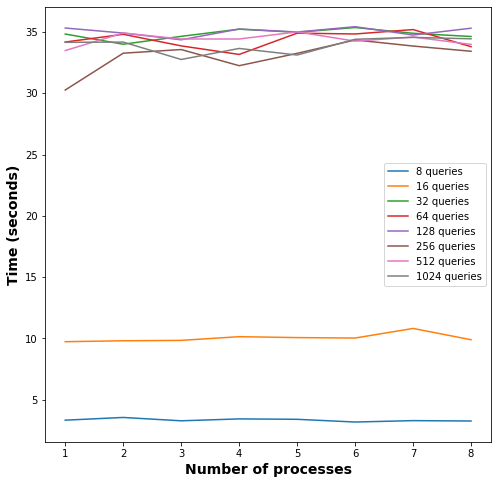

In [49]:
fpaths = glob.glob("benchmarks/*")
parallelisms = list(range(1, 8+1))
results = AlgoResults(fpaths)
for fpath in fpaths:
    for parallelism in parallelisms:
        results.add(AlgoResult(fpath, parallelism, run(fpath, parallelism)))

results.plot()